# <a href="https://colab.research.google.com/drive/1ytY1n4b4z0wYVWMHDmI9aAjxhmI59LG-?usp=sharing">Click Here</a> to open this file on Google Colab

# Importing Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loading & Describing The Data

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.shape

(5000, 7)

This represents 7 columns and 20640 rows.

In [4]:
housing.head() #printing the top 5 (0–4) rows

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


<AxesSubplot:xlabel='Avg. Area Income'>

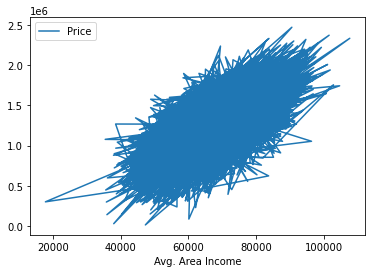

In [5]:
housing.plot("Avg. Area Income", "Price")

As can be seen, the graph is difficult to understand. There are various lines making it difficult to see individual trends. So, to remedy this, we should use a scatter plot without individual lines.

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Price'>

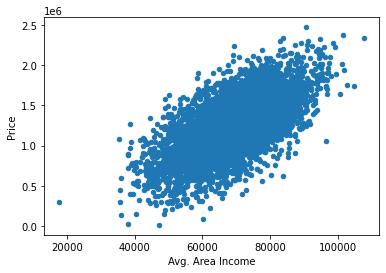

In [6]:
housing.plot.scatter("Avg. Area Income", "Price")

As can be seen, the correlation is significantly more apparent because there are no longer random lines to distract.
Now, it is time to actually start to analyze the data. We can start this off by running a particular directive.

In [7]:
# changing column name beacuse i am getting some error beacuse of periods in column names
housing = housing.rename(columns={"Avg. Area Income":"median_income"})

# spliting up the data as “train” and “test.”

In [8]:
x_train, x_test, y_train, y_test = train_test_split(housing.median_income, housing.Price, test_size = 0.2)

The overall data will be split up into 80% as train and 20% as test. The “y-values” will be the “median_house_value,” and the “x-values” will be the “median_income.”

# Linear Regression

In [9]:
regr = LinearRegression()
#This will call LinearRegression(), and then allow us to use our own data to predict.

In [10]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)
#This will shape the model using one predictor. Reshape is being applied to change it from pandas to NumPy, and finally into a vector. (Reshape transverses it from a single dimension matrix to a vertical shape.)
#Then, we need to pass in the data to give predictions.

LinearRegression()

In [11]:
preds = regr.predict(np.array(x_test).reshape(-1,1))
#We can compare our predictions with the actual values.

In [12]:
y_test.head()

4059    1.144319e+06
3943    1.622262e+06
1667    1.450394e+06
1818    8.496569e+05
641     1.175869e+06
Name: Price, dtype: float64

In [13]:
preds

array([1246976.81085857, 1434395.61921264, 1315419.08968227,
       1088684.59782243, 1297262.06087782, 1199765.52580571,
       1390274.12123695, 1150511.09063525, 1155878.86669594,
       1251756.55490645,  935256.4160059 , 1176587.61631308,
       1585085.59746536, 1022707.98212325,  694779.67800646,
       1211547.35520645, 1322563.77817113,  942719.95152113,
       1412906.54780624, 1392404.44540921, 1163362.6884565 ,
       1322984.64640839, 1342778.1563494 , 1290787.05178817,
       1648836.28979527,  944754.56913304, 1405743.5051086 ,
        681712.4324883 ,  960996.17651041, 1344364.93192075,
       1409073.69527234, 1067232.39280586, 1319615.21170183,
       1046751.27298454, 1454336.67502335, 1186776.86386024,
        705861.47748193, 1332042.74147251, 1150132.25783976,
        976758.75072066,  931674.06814713, 1096416.29051527,
       1035190.65098742, 1380756.53070421, 1432446.3821792 ,
       1287391.76515857, 1411999.88411601, 1194427.61785197,
       1369216.63758454,

In [14]:
residuals = preds - y_test

(array([  1.,   7.,  42., 130., 229., 259., 205., 100.,  22.,   5.]),
 array([-982595.52455808, -797484.44426883, -612373.36397957,
        -427262.28369032, -242151.20340106,  -57040.12311181,
         128070.95717745,  313182.0374667 ,  498293.11775596,
         683404.19804521,  868515.27833447]),
 <BarContainer object of 10 artists>)

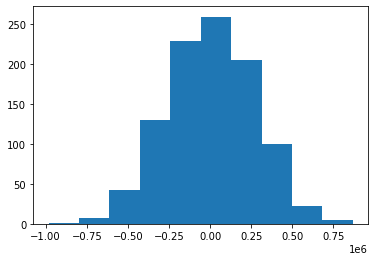

In [15]:
plt.hist(residuals)

In [16]:
mean_squared_error(y_test, preds) ** 0.5

264833.8451132661

The overall mean squared error should be 277491.8044424242 or ~277491.8.

# Submitted By : <a href="https://www.linkedin.com/in/saurabh-satapathy-692a6a1b9">Saurabh Satapathy</a>